# Average house prices - PCA

In this jupyter notebook, we will implement PCA algortihm and then apply it to average house prices in Boston [dataset](http://lib.stat.cmu.edu/datasets/boston).

In [1]:
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

### a) Create normalization function, that will normalize the data to 0 mean and unit variance.

In [2]:
def myNormalize(x):
  return (x - x.mean(axis=0)) / x.std(axis=0)

# To test if we were successful
x = 5 + (np.random.randn(3,3) * 2)
normed = myNormalize(x)
print('mean:', normed.mean(axis=0))
print('std:', normed.std(axis=0))

mean: [ 2.96059473e-16  2.77555756e-16 -1.03620816e-15]
std: [1. 1. 1.]


### b) Create custom PCA function basen on the algorithms that we have learned from lectures

In [3]:
def myPCA(x, k):
  # 1. get covariance matrix
  K = np.cov(x, rowvar=False)

  # 2. compute eigenvalue and eigenvectors
  v, W = np.linalg.eigh(K)

  # 3. sort eigenvectors
  idx = v.argsort()[::-1]

  v_sorted = v[idx]
  W_sorted = W[:,idx]

  # 4. return k first eigenvectors
  return W_sorted[:,0:k].T

# again we can compare our eigenvectors with the ones from sklearn
my_components = myPCA(normed, 2)
print(my_components)

pca = PCA(n_components=2)
pca.fit(normed)
print(pca.components_)

[[-0.66765553 -0.26475092 -0.69580388]
 [ 0.2984803  -0.95141651  0.07560517]]
[[-0.66765553 -0.26475092 -0.69580388]
 [ 0.2984803  -0.95141651  0.07560517]]


### c) Apply our functions to averate house prices in Boston dataset

In [4]:
# download dataset an remove header
!wget http://lib.stat.cmu.edu/datasets/boston
!sed -e '1,22d' < boston > boston.txt

--2021-12-27 16:56:22--  http://lib.stat.cmu.edu/datasets/boston
Resolving lib.stat.cmu.edu (lib.stat.cmu.edu)... 128.2.12.64
Connecting to lib.stat.cmu.edu (lib.stat.cmu.edu)|128.2.12.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51256 (50K) [text/plain]
Saving to: ‘boston’

boston              100%[===================>]  50.05K   251KB/s    in 0.2s    

2021-12-27 16:56:22 (251 KB/s) - ‘boston’ saved [51256/51256]



As the provided dataset was with with extra \n after 11th feature, we needed to parse it a little. Simply split each line on whitespaces and if the line has 3 features concatenate it with the last in data list.

In [5]:
data = []

with open('boston.txt','r') as f:
  for line in f:
    item = list(map(float,line.split()))

    if len(item) == 3:
      data[-1] = data[-1] + item
    else:
      data.append(item)

data = np.array(data)

In [6]:
# check if we have the right shape
print(data)
data.shape

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


(506, 14)

In [7]:
# remove last feature
# also check if we have the right shape
train = data[:,:-1]
print(train)
print(train.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


Get frist 2 eigenvectors.

In [8]:
components = myPCA(myNormalize(train), 2)

In this section I was kinda confused. The assignment tells us to plot components in 2D graph (should we print the eigenvectors? should it be simple plot?). My common sense tells me that the the data should be transform by the first and second eigenvector and plotet as scatter plot. I hope my common sense was right :)

Get first pricncipal component.

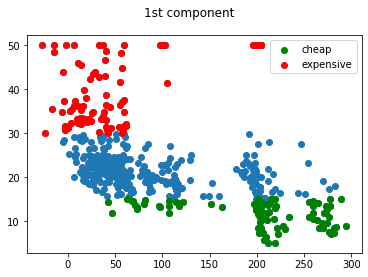

In [9]:
PC1 = train@components[0].T

fig = plt.figure()
fig.suptitle('1st component')
plt.scatter(PC1, data[:,13])
plt.scatter(PC1[data[:,13] <= 15], data[data[:,13] <= 15][:,13], label='cheap', color='green')
plt.scatter(PC1[data[:,13] >= 30], data[data[:,13] >= 30][:,13], label='expensive', color='red')
plt.legend(loc='best')

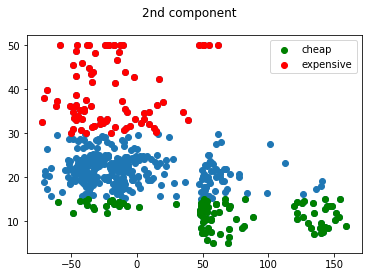

In [10]:
PC2 = train@components[1].T

fig = plt.figure()
fig.suptitle('2nd component')
plt.scatter(PC2, data[:,13])
plt.scatter(PC2[data[:,13] <= 15], data[data[:,13] <= 15][:,13], label='cheap', color='green')
plt.scatter(PC2[data[:,13] >= 30], data[data[:,13] >= 30][:,13], label='expensive', color='red')
plt.legend(loc='best')
plt.legend(loc='best')

### Conclusion

The conclusion that we can draw from plotting the first and second principal components, is that the density of the cheapest houses is highier when first pricipal component is in range 200-250 and the second principal components is in range 50-75.

We can say that that it's more common for cheaper houses to have PC1 in 200-250 and PC2 in 50-75. Also we can say that it's more commont for expensive houses to have PC1 in -10-50 and PC2 in -60-0.